In [5]:
import os
import json
import re
import numpy as np


def normalize(s):
    return re.sub(" +", " ", re.sub("[^ \w]|\d", " ", s.lower()))


def select_ingrids(ingrids):
    words = []
    for s in ingrids:
        words += list(filter(lambda x: x, normalize(s).split(' ')))
    return words


def read_recipe(filename):
    with open(filename, 'r') as file:
        rec = json.loads(file.read())
        if "ingredients" not in rec:
            raise ValueError
        rec["ingredients"] = select_ingrids(rec["ingredients"])
        return rec


def read_all_recipes_ingrid(dir):
    all_rec = []
    k = 0
    for file in os.listdir(dir):
        if k % 1000 == 0:
            print("\r{}".format(k))
        try:
            all_rec.append(read_recipe(dir + "/" + file)["ingredients"])
        except ValueError:
            pass
        k += 1
    return all_rec


def read_all_recipes(dir):
    all_rec = []
    k = 0
    for file in os.listdir(dir):
        if k % 1000 == 0:
            print("\r{}".format(k))
        try:
            all_rec.append(read_recipe(dir + "/" + file))
        except ValueError:
            pass
        k += 1
    return all_rec


def code_ingrids(recipes):
    ingrids = {}
    for recipe in recipes:
        for ingrid in recipe["ingredients"]:
            if ingrid not in ingrids:
                ingrids[ingrid] = len(ingrids)
    return ingrids


def bag_of_words(recipe, ingrid_int_map):
    vec = np.zeros(len(ingrid_int_map))
    for ingrid in recipe["ingredients"]:
        if ingrid_int_map[ingrid] > len(ingrid_int_map):
            print(ingrid)
            print(ingrid_int_map[ingrid])
        vec[ingrid_int_map[ingrid]] += 1
    return vec


def recipe_vec(recipe, ingrid_int_map):
    vec = bag_of_words(recipe, ingrid_int_map)
    return vec


def recipes_vec(recipes):
    ingrid_int_map = code_ingrids(recipes)
    print("dict len:", len(ingrid_int_map))
    vec = np.zeros((len(recipes), len(ingrid_int_map)))
    for i in range(len(recipes)):
        vec[i] = recipe_vec(recipes[i], ingrid_int_map)
    return vec


In [6]:
all_recipes_ingrid = read_all_recipes_ingrid("../dataset")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [78]:
words_hist = dict()
more_then_two = dict()
for ingr_list in all_recipes_ingrid:
    ingr_dict = {}
    for ingr in ingr_list:
        if ingr not in ingr_dict:
            ingr_dict[ingr] = 1
        else:
            ingr_dict[ingr] += 1
    for ingr, count in ingr_dict.items():
        if ingr not in words_hist:
            words_hist[ingr] = count
        else:
            words_hist[ingr] += count
        if count < 3:
            continue
        if ingr not in more_then_two:
            more_then_two[ingr] = count
        else:
            more_then_two[ingr] += count


In [79]:
more_then_two_list = sorted(more_then_two.items(), key=lambda kv: kv[1])
words_hist_list = sorted(words_hist.items(), key=lambda kv: kv[1])

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [89]:
print(len(words_hist_list), len(more_then_two_list))

6844 899


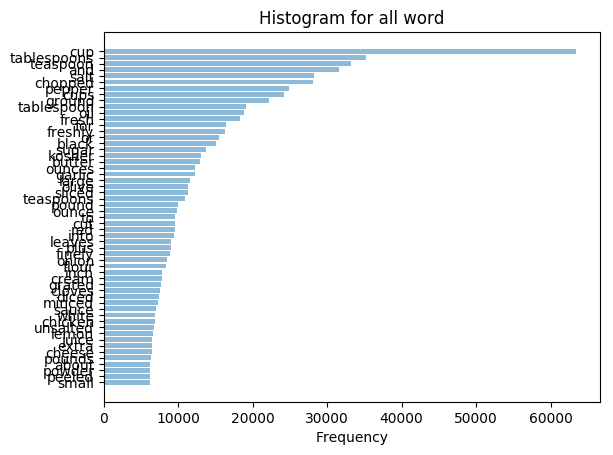

In [90]:
objects = []
performance = []

for element in words_hist_list:
    if element[1] > 60
        objects.append(element[0])
        performance.append(element[1])

y_pos = np.arange(len(objects))

 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Histogram for all word')

plt.show()

In [77]:
objects = []
performance = []

for element in more_then_two_list:
    if element[1] > 500:
        objects.append(element[0])
        performance.append(element[1])

y_pos = np.arange(len(objects))

 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Histogram repeted word')
 
plt.show()

In [128]:
rare_word = set([elem[0] for elem in words_hist_list if elem[1] < 15])
black_list = set()
with open("../black_list.txt", "r") as black_list_file:
    for word in black_list_file:
        black_list.add(word.strip())


In [133]:
all_recipes = read_all_recipes("../dataset")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [140]:
filtered_recipe_list = []
index = 0
for recipe in all_recipes:
    ingr_set = set(recipe["ingredients"])
    if (ingr_set.intersection(rare_word)):
        continue    
    new_recipe = {k: v for k, v in recipe.items()}
    new_recipe["ingredients"] = list(ingr_set - black_list)
    filtered_recipe_list.append(new_recipe)
    

In [191]:
len(filtered_recipe_list)

18624

In [148]:
import json

In [150]:
index = 0
for recipe in filtered_recipe_list:
    with open("../filtered_dataset/" + str(index) + ".json", "w") as file:
        file.write(json.dumps(recipe))
    index += 1

In [172]:
cuisines = [recipe["cuisine"].split(",")[0] for recipe in filtered_recipe_list]

In [187]:
cuisines_spect = {cuisine:0 for cuisine in (set(cuisines) - {""})}

In [188]:
for recipe in filtered_recipe_list:
    cuisine = recipe["cuisine"].split(",")[0]
    if cuisine:
        cuisines_spect[cuisine] += 1
cuisines_spect

{'venezuelan': 1, 'brazilian': 2, 'indian': 93, 'asian': 412, 'canadian': 7, 'jewish-cooking': 39, 'latin-american': 4, 'central-american': 5, 'european': 735, 'argentinean': 16, 'turkish': 3, 'peruvian': 14, 'caribbean': 91, 'russian': 10, 'french': 253, 'italian': 1053, 'cuban': 62, 'african': 52, 'mexican': 422, 'lebanese': 4, 'middle-eastern': 68, 'israeli': 2, 'american': 3148}


In [189]:
cuisines = {cuisine: val for cuisine, val in cuisines_spect.items() if val > 9}

In [190]:
print(cuisines)

{'indian': 93, 'asian': 412, 'jewish-cooking': 39, 'european': 735, 'argentinean': 16, 'peruvian': 14, 'caribbean': 91, 'russian': 10, 'french': 253, 'italian': 1053, 'cuban': 62, 'african': 52, 'mexican': 422, 'middle-eastern': 68, 'american': 3148}


In [ ]:
for recipe in filtered_recipe_list:
    cuisine = recipe["cuisine"].split(",")[0]
    if cuisine:
        for ingr in recipe[""]
        cuisines_spect[cuisine] += 1
print(cuisines_spect)